## Search Trend Forecasting using Google Trends and Prophet

This Python script is designed to retrieve Google Trends data, preprocess it, analyze it using time-series forecasting with the Prophet library, and then visualize the results.

#### 1. Importing Libraries
###### pytrends.request: A library to fetch Google Trends data.
###### pandas: Used for data manipulation and organization.
###### Prophet: A library developed by Facebook for time-series forecasting, particularly well-suited for data with clear seasonality and trends.
###### plotly.graph_objects: Enables interactive plotting.
###### sklearn.metrics: Provides metrics for model evaluation, specifically Mean Squared Error (MSE) and Mean Absolute Error (MAE), which assess the accuracy of the forecasts.
#### 2. Fetching Data
The function fetch_search_data() retrieves data from Google Trends for a specified keyword and date range. It creates a payload for Google Trends with pytrends.build_payload() and retrieves the interest_over_time() data, which shows the search interest over time for the keyword.

If no data is found, it raises an error.
If successful, it returns the data, which includes a timestamped index column and the interest values for the keyword.
3. Preprocessing Data
The function preprocess_data() prepares the data by:

Resetting the index to make the date column accessible.
Renaming columns to ds (required by Prophet as the date column) and y (the column of interest).
Forward-filling any missing values in the data with the last available data point.
Ensuring the data types are correct by using infer_objects().
#### 4. Saving Data
The function save_data_to_csv() saves the processed data to a CSV file, enabling data archiving for further analysis or auditing.

#### 5. Model Training
The function train_model() uses the Prophet library to create a forecasting model with the data. Prophet models seasonal trends and patterns, making it ideal for Google Trends data which often has strong weekly and monthly seasonality.

#### 6. Forecasting Future Data
The function forecast_future() generates future data points for a specified number of days using Prophet’s make_future_dataframe() method. It creates a dataframe that includes both historical and forecasted data and then applies the model.predict() function to estimate future values.

#### 7. Calculating Accuracy
The function calculate_accuracy() evaluates the model’s forecast against actual historical data. It merges the historical and forecasted data based on dates, then calculates Mean Squared Error (MSE) and Mean Absolute Error (MAE), which measure the difference between predicted and actual values.

#### 8. Plotting the Forecast
The function plot_forecast_interactive() creates an interactive plot of the forecasted and historical data:

The historical data is shown as markers.
The forecasted data is shown as a line, with the upper and lower confidence bounds represented in light gray.
The plot includes titles and labels for better readability and understanding.

#### 9. Plotting Forecast Components
The plot_components_interactive() function uses Prophet’s built-in plotting function to show the components of the forecast (e.g., weekly trends, yearly seasonality). It helps in understanding the underlying patterns in the data.

#### 10. Main Execution (main())
The main() function orchestrates the entire process:

###### User Input: It prompts the user for a keyword, start date, end date, and forecast period.
###### Data Retrieval and Preprocessing: It fetches and preprocesses the data. If the data is empty, it exits.
###### Data Saving: Saves the preprocessed data to a CSV file.
###### Model Training and Forecasting: Trains the model and makes future predictions.
###### Plotting: Plots both the forecast and the components interactively.
###### Accuracy Calculation: Prints MSE and MAE to evaluate model performance.
###### Display Forecasted Data: Shows the last 30 days of the forecast, including the lower and upper confidence intervals.
###### The if __name__ == "__main__": statement ensures that main() is only executed when the script is run directly, not when imported as a module.

##### In summary, this script allows a user to analyze search interest over time, make future predictions, evaluate model accuracy, and visualize trends interactively. It is well-suited for projects involving trend analysis, time-series forecasting, and data visualization.

## Search Trend Forecasting using Google Trends and Prophet

Enter the keyword to analyze:  covid
Enter the start date (YYYY-MM-DD):  2018-01-01
Enter the end date (YYYY-MM-DD):  2024-10-01
Enter the number of days to forecast:  7


Data saved successfully as search_data.csv


11:21:46 - cmdstanpy - INFO - Chain [1] start processing
11:21:46 - cmdstanpy - INFO - Chain [1] done processing


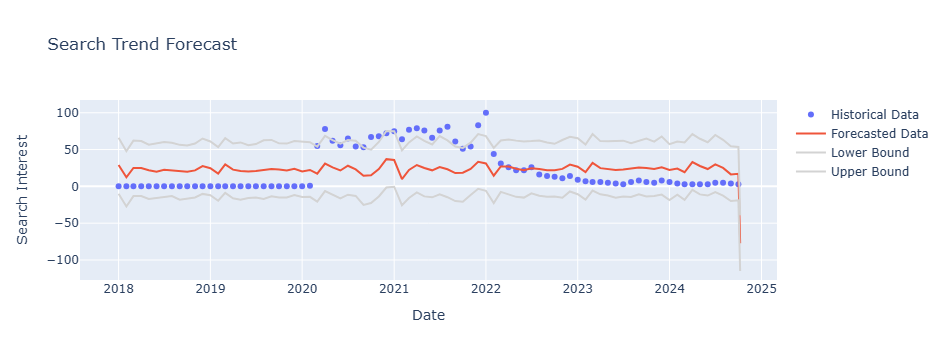

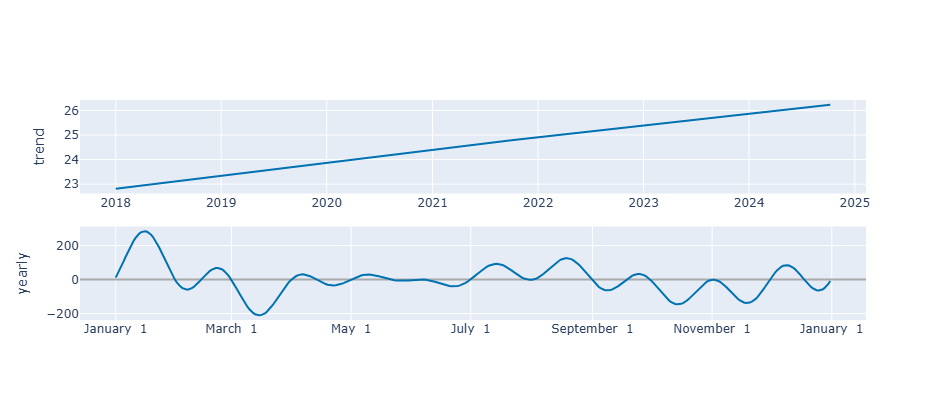

Model Evaluation:
MSE: 858.09
MAE: 25.72
           ds       yhat  yhat_lower  yhat_upper
59 2022-12-01  29.621942   -6.957584   67.258221
60 2023-01-01  26.688399  -10.631271   65.338145
61 2023-02-01  19.291708  -17.970053   56.784124
62 2023-03-01  31.934619   -5.673578   71.045787
63 2023-04-01  24.745009  -10.770734   61.448348
64 2023-05-01  23.048261  -12.378064   61.228975
65 2023-06-01  22.163012  -15.353197   61.674175
66 2023-07-01  22.887521  -13.792836   62.070447
67 2023-08-01  23.894412  -14.298142   58.733785
68 2023-09-01  25.750885  -10.908770   62.335033
69 2023-10-01  25.070318  -13.677320   64.977777
70 2023-11-01  23.702184  -13.165691   60.784245
71 2023-12-01  25.858586  -11.146271   67.768394
72 2024-01-01  22.346243  -18.585422   57.279625
73 2024-02-01  24.249462  -11.356166   60.768677
74 2024-03-01  19.166603  -18.324632   59.653978
75 2024-04-01  32.933605   -4.715651   70.986545
76 2024-05-01  27.714851  -10.869027   64.690961
77 2024-06-01  23.524301  -1

In [11]:
from pytrends.request import TrendReq  # Library for accessing Google Trends data
import pandas as pd  # Library for data manipulation and analysis
from prophet import Prophet  # Library for time-series forecasting
import plotly.graph_objects as go  # Library for interactive plots
from prophet.plot import plot_components_plotly  # Library for plotting components with Plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Metrics for model evaluation

# --- Fetching Data ---
def fetch_search_data(keyword, start_date, end_date):
    """Fetches search trend data from Google Trends for the specified keyword and date range."""
    try:
        pytrends = TrendReq(hl='en-US', tz=360)
        pytrends.build_payload([keyword], timeframe=f'{start_date} {end_date}')
        data = pytrends.interest_over_time()
        if data.empty:
            raise ValueError("No data found for the given parameters.")
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

# --- Preprocessing Data ---
def preprocess_data(data, keyword):
    """Prepares the data for model training by renaming columns and filling missing values."""
    data = data.reset_index()
    data.rename(columns={'date': 'ds', keyword: 'y'}, inplace=True)
    data['y'] = data['y'].ffill()  # Forward fill missing values
    data = data.infer_objects()  # Ensure correct data types
    return data

# --- Saving Data ---
def save_data_to_csv(data, filename="search_data.csv"):
    """Saves the preprocessed data to a CSV file."""
    try:
        data.to_csv(filename, index=False)
        print(f"Data saved successfully as {filename}")
    except Exception as e:
        print(f"Error saving data: {e}")

# --- Model Training ---
def train_model(data):
    """Trains the Prophet model using the provided data."""
    model = Prophet()
    model.fit(data)
    return model

# --- Forecasting Future Data ---
def forecast_future(model, periods=30):
    """Generates future forecast for the specified number of periods."""
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# --- Calculating Accuracy ---
def calculate_accuracy(historical_data, forecast):
    """
    Calculate MSE and MAE for the forecasted vs actual data.
    """
    # Align forecast with historical data
    merged = pd.merge(historical_data, forecast[['ds', 'yhat']], on='ds', how='inner')
    mse = mean_squared_error(merged['y'], merged['yhat'])
    mae = mean_absolute_error(merged['y'], merged['yhat'])
    return mse, mae

# --- Plotting Forecast ---
def plot_forecast_interactive(forecast, historical_data):
    """Creates an interactive plot of the forecasted and historical data."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=historical_data['ds'], y=historical_data['y'], mode='markers', name='Historical Data'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecasted Data'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', line=dict(color='lightgray'), name='Lower Bound'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', line=dict(color='lightgray'), name='Upper Bound'))
    fig.update_layout(
        title='Search Trend Forecast',
        xaxis_title='Date',
        yaxis_title='Search Interest',
        showlegend=True
    )
    fig.show()

# --- Plotting Components ---
def plot_components_interactive(model, forecast):
    """Plots the components of the forecast using Prophet's Plotly integration."""
    fig = plot_components_plotly(model, forecast)
    fig.show()

# --- Main Execution ---
def main():
    """Main function to execute the Google Trends forecast analysis."""
    try:
        keyword = input("Enter the keyword to analyze: ")
        start_date = input("Enter the start date (YYYY-MM-DD): ")
        end_date = input("Enter the end date (YYYY-MM-DD): ")
        forecast_period = int(input("Enter the number of days to forecast: "))

        # Fetch and preprocess data
        data = fetch_search_data(keyword, start_date, end_date)
        if data.empty:
            print("No data available. Exiting.")
            return
        preprocessed_data = preprocess_data(data, keyword)
        
        # Save the preprocessed data to a CSV file
        save_data_to_csv(preprocessed_data, "search_data.csv")

        # Train the model and forecast future values
        model = train_model(preprocessed_data)
        forecast = forecast_future(model, periods=forecast_period)

        # Plot the forecast and components interactively
        plot_forecast_interactive(forecast, preprocessed_data)
        plot_components_interactive(model, forecast)

        # Calculate and print evaluation metrics
        mse, mae = calculate_accuracy(preprocessed_data, forecast)
        print(f"Model Evaluation:\nMSE: {mse:.2f}\nMAE: {mae:.2f}")

        # Print the last few forecasted values
        print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()
